# **Iris Flower Classification – Introduction**

This notebook demonstrates a beginner-friendly machine learning workflow using the Iris Flower Dataset.
The goal is to classify Iris flowers into three species — Setosa, Versicolor, and Virginica — based on four features:  
* Sepal length (cm)  
* Sepal width (cm)  
* Petal length (cm)  
* Petal width (cm)  

I keep the approach simple: load the dataset, explore it briefly, train multiple basic ML models, and identify which model performs the best.

## Import Modules

In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## Loading the Dataset

In [87]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head() # by default 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
# to display stats about data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [90]:
# to display number of samples of each type
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


## Preprocessing the data

In [91]:
# check for null values
df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


## Exploratory Data Analysis

<Axes: >

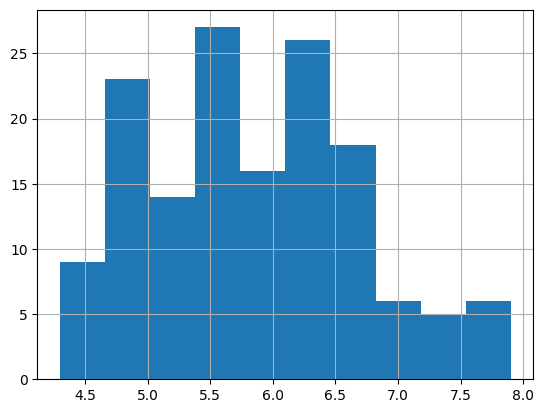

In [92]:
df['sepal length (cm)'].hist()


<Axes: >

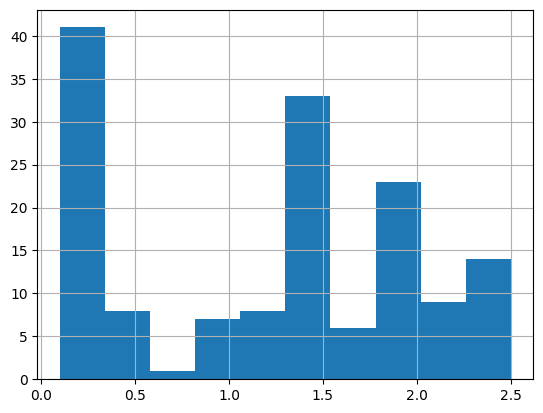

In [93]:
df['petal width (cm)'].hist()

<Axes: >

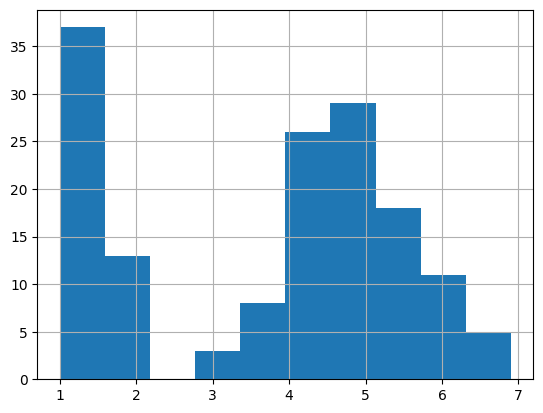

In [94]:
df['petal length (cm)'].hist()

<Axes: >

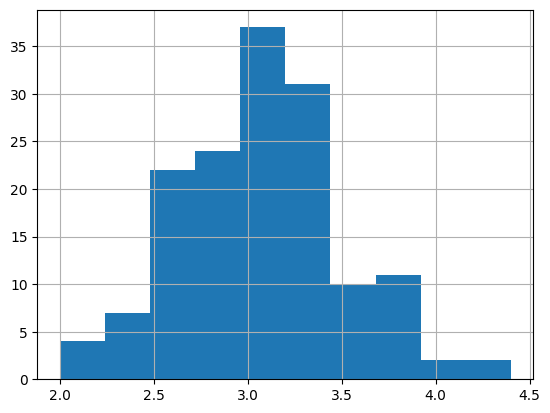

In [95]:
df['sepal width (cm)'].hist()


In [96]:
# scatter plot
colors=['red', 'yellow','blue']
target=[0,1,2]

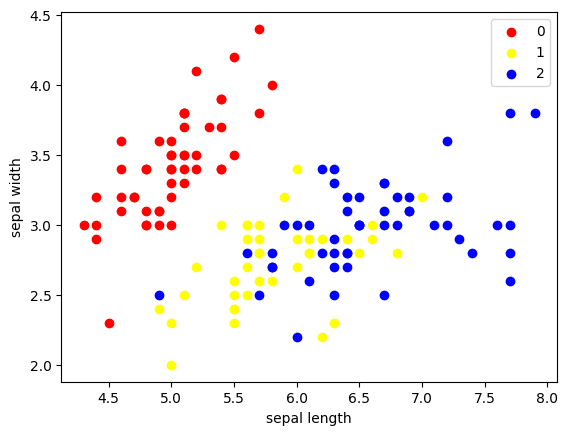

In [97]:
for i in range(3):
  x=df[df['target']==target[i]]
  plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c=colors[i], label=target[i])
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.legend()

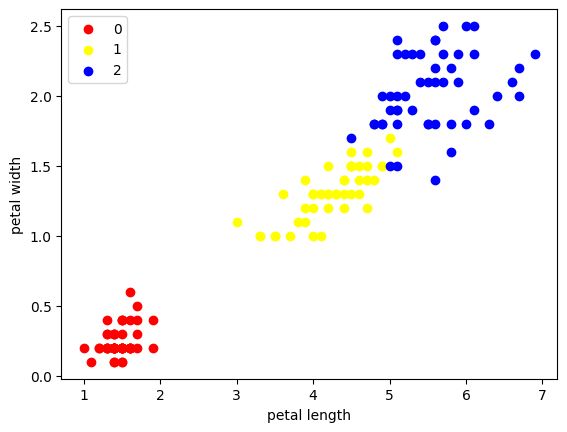

In [98]:
for i in range(3):
  x=df[df['target']==target[i]]
  plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colors[i], label=target[i])
plt.xlabel("petal length")
plt.ylabel('petal width')
plt.legend()

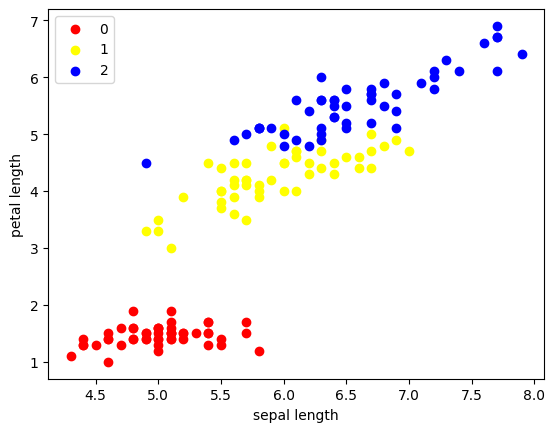

In [99]:
for i in range(3):
  x=df[df['target']==target[i]]
  plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label=target[i])
plt.xlabel("sepal length")
plt.ylabel('petal length')
plt.legend()

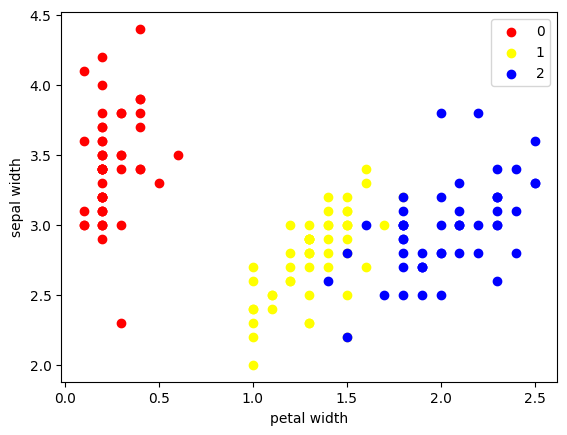

In [100]:
for i in range(3):
  x=df[df['target']==target[i]]
  plt.scatter(x['petal width (cm)'], x['sepal width (cm)'], c=colors[i], label=target[i])
plt.xlabel("petal width")
plt.ylabel('sepal width')
plt.legend()

### Correlation Matrix


In [101]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

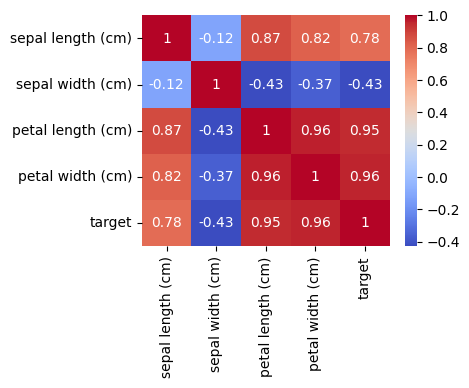

In [102]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm') #the attributes are assigned colors and we can see which has more coorelation looking at the colors

## Model Training

In [103]:
from sklearn.model_selection import train_test_split
# train 75
# test 25
X=df.drop(columns=['target'])
Y=df['target']
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.25, random_state= 1)

### Logistic Regression


In [104]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [105]:
model.fit(x_train, y_train)

LogisticRegression()

In [106]:
# performance of model
print("Acurracy:", model.score(x_test, y_test)* 100)

Acurracy: 97.36842105263158


In [107]:
# confusing matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, model.predict(x_test))
print(cm1)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [122]:
# classification report
from sklearn.metrics import classification_report
cr1=classification_report(y_test, model.predict(x_test))
print(cr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### kNN

In [126]:
# using kNN (k-Nearest Neighbours)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [109]:
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
# performance of model
print("Accuracy:", model2.score(x_test, y_test)*100)

Accuracy: 100.0


In [111]:
# confusion matrix
cm2= confusion_matrix(y_test, model2.predict(x_test))
print(cm2)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [121]:
# classification report
from sklearn.metrics import classification_report
cr2=classification_report(y_test, model2.predict(x_test))
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Decision tree

In [112]:
# using decision tree
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()

In [113]:
model3.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
# performance of model
print("Accuracy:", model3.score(x_test, y_test)*100)

Accuracy: 97.36842105263158


In [115]:
# confusion matrix
cm3= confusion_matrix(y_test, model2.predict(x_test))
print(cm3)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [123]:
# classification report
from sklearn.metrics import classification_report
cr3=classification_report(y_test, model3.predict(x_test))
print(cr3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### SVM

In [116]:
# using svm
from sklearn.svm import SVC
model4 = SVC()

In [117]:
model4.fit(x_train, y_train)

SVC()

In [125]:
# performance of model
print("Accuracy:", model4.score(x_test, y_test)*100)

Accuracy: 97.36842105263158


In [119]:
# confusion matrix
cm4= confusion_matrix(y_test, model4.predict(x_test))
print(cm4)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [124]:
# classification report
from sklearn.metrics import classification_report
cr4=classification_report(y_test, model4.predict(x_test))
print(cr4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## **Model Performance Comparison**  

| Model              | Accuracy | Precision | Recall | F1-Score |
|-------------------|----------|-----------|--------|----------|
| Linear Regression  | 0.97     | 0.96      | 0.98   | 0.97     |
| kNN                | 1.00     | 1.00      | 1.00   | 1.00     |
| Decision Tree      | 0.97     | 0.96      | 0.98   | 0.97     |
| SVC                | 0.97     | 0.96      | 0.98   | 0.97     |

## Conclusion
This project demonstrated that multiple machine learning algorithms can classify Iris species with high accuracy due to the dataset's clean structure and well-separated classes. Among all tested models, K-Nearest Neighbors (KNN) performed the best, indicating that simple distance-based methods can effectively capture the underlying patterns of low-dimensional, structured data. With further improvements—such as hyperparameter tuning or cross-validation—the overall performance can be enhanced even more.